## bnweth.dtypes

bnpepe.dtypes

In [1]:
import json
import pandas as pd
import requests
import numpy as np
import pickle
import time
from pandas import Timedelta
import sqlite3
bnweth=pd.read_csv('binance_filtered.csv')
bnpepe= pd.read_csv('binance_pepe_usdc_price.csv')


# bnweth['timestamp'] = pd.to_numeric(bnweth['timestamp'], errors='coerce') / 1000000
# bnweth['block_timestamp'] = pd.to_datetime(bnweth['timestamp'], unit='s')
bnweth['timestamp_dt'] = pd.to_datetime(bnweth['timestamp_dt'], errors='coerce')
# bnpepe['timestamp'] = pd.to_numeric(bnpepe['timestamp'], errors='coerce') / 1000000
# bnpepe['block_timestamp'] = pd.to_datetime(bnpepe['timestamp'], unit='s')
bnpepe['timestamp_dt'] = pd.to_datetime(bnpepe['timestamp'], unit='us')


df = pd.read_csv('combinedV2.csv')

In [2]:
df.head()

,tx_hash,block_no,venue,input_asset,output_asset,input_amount,output_amount,reserve0,reserve1,realistic_gas,...,closest_BN_price,closest_BN_timestamp,asset,solver_executed_price,markout_percentage,net_simulated_v2_output_amount,solver_versus_v2_welfare,log_eth_volume,net_simulated_v3_output_amount,solver_versus_v3_welfare
0,0x485fe03c2baee1cfeecce966aad86b5a1b142c5a115d...,18000021,UNIX,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1132338275,683271196702525600,27968825458610,16954644756135849461661,6.503093e+10,...,1649.365,1.693067e+09,weth,1657.231097,-0.004769,6.766081e+17,0.009848,-0.380863,6.778783e+17,0.007956
1,0x1477ff2493f41dcadfed7f0e1002442134e04ba3ce3a...,18002452,UNIX,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,250000000,150350103079541160,27958625107856,16962955870109058457410,1.267909e+10,...,1648.150,1.693096e+09,weth,1662.785691,-0.008880,1.497163e+17,0.004233,-1.894789,1.501316e+17,0.001455
2,0x9f07e1237919248dedc8dac6a9faf3acd385f9f15285...,18002572,UNIX,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2000000000000000000,3291804980,27948724368819,16969489650601415993274,1.401100e+10,...,1647.045,1.693098e+09,weth,1645.902490,-0.000694,3.281038e+09,0.003282,0.693147,3.289949e+09,0.000564
3,0x7f0af71f67d703bf0967141f1774e02f6fb9f67ad83b...,18002936,UNIX,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,3550000000000000000,5849352969,27958542330657,16964265998317798386562,3.100000e+10,...,1648.750,1.693102e+09,weth,1647.705062,-0.000634,5.825973e+09,0.004013,1.266948,5.844110e+09,0.000897
4,0xb3ae190ebfd68fad9d6e5d58e69779c96675592e53c1...,18007571,UNIX,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2000000000000000000,3304623369,28085516240362,16947254029860764337790,1.460458e+10,...,1653.635,1.693158e+09,weth,1652.311684,-0.000800,3.301308e+09,0.001004,0.693147,3.304267e+09,0.000108


In [3]:
df.iloc[0]

tx_hash                           0x485fe03c2baee1cfeecce966aad86b5a1b142c5a115d...
block_no                                                                   18000021
venue                                                                          UNIX
input_asset                              0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
output_asset                             0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
input_amount                                                             1132338275
output_amount                                                    683271196702525600
reserve0                                                             27968825458610
reserve1                                                    16954644756135849461661
realistic_gas                                                         65030930579.0
v2_unit                                                                    118807.0
v3_unit                                                                    1

In [4]:
df = df[df['solver_executed_price'] > 0]

In [5]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'], unit='s')

# # Sort the dataframe by block_timestamp to ensure proper grouping
df = df.sort_values(by='block_timestamp')

In [6]:
df.dtypes

tx_hash                                   object
block_no                                   int64
venue                                     object
input_asset                               object
output_asset                              object
input_amount                              object
output_amount                             object
reserve0                                  object
reserve1                                  object
realistic_gas                            float64
v2_unit                                  float64
v3_unit                                  float64
direction                                 object
eth_volume                               float64
block_timestamp                   datetime64[ns]
closest_BN_price                         float64
closest_BN_timestamp                     float64
asset                                     object
solver_executed_price                    float64
markout_percentage                       float64
net_simulated_v2_out

In [7]:
df.iloc[0]

tx_hash                           0x447a5af28db765a308b0f75c06868360f3bd26c3dbfb...
block_no                                                                   17053656
venue                                                                         1INCH
input_asset                              0x6982508145454ce325ddbe47a25d4ec3d2311933
output_asset                             0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
input_amount                                          65296678042998388286607871235
output_amount                                                     51522964385948300
reserve0                                           32236144229882767071443753276219
reserve1                                                       26236937484158798509
realistic_gas                                                         29638962257.0
v2_unit                                                                    112465.0
v3_unit                                                              2985860

In [8]:
# Create DataFrame for UNIX venue
df_unix = df[df['venue'] == 'UNIX']
df_unix_pepe = df_unix[df_unix['asset']=='pepe']
df_unix_weth = df_unix[df_unix['asset']=='weth']

# Create DataFrame for 1INCH venue
df_1inch = df[df['venue'] == '1INCH']
df_1inch_pepe = df_1inch[df_1inch['asset']=='pepe']
df_1inch_weth = df_1inch[df_1inch['asset']=='weth']

# Create DataFrame for COW venue
df_cow = df[df['venue'] == 'COW']
df_cow_pepe = df_cow[df_cow['asset']=='pepe']
df_cow_weth = df_cow[df_cow['asset']=='weth']

In [9]:
timeframe = '2H'

In [10]:
def calculate_realized_volatility_from_binance(binance_data, start_time, end_time):
    # Filter binance_data for the time range
    prices_in_range = binance_data[
        (binance_data['timestamp_dt'] >= start_time) & 
        (binance_data['timestamp_dt'] < end_time)
    ]['binance_price'].values  # Replace 'solver_executed_price' with the correct price column if different
    
    # Ensure valid prices
    prices_in_range = prices_in_range[~np.isnan(prices_in_range)]  # Remove NaN
    prices_in_range = prices_in_range[prices_in_range > 0]         # Remove zero or negative prices

    # Calculate realized volatility if there are enough prices
    if len(prices_in_range) < 2:
        return np.nan
    log_returns = np.log(prices_in_range[1:] / prices_in_range[:-1])
    return np.sqrt(np.mean(log_returns**2))

In [11]:
df_unix_pepe['window'] = df_unix_pepe['block_timestamp'].dt.floor(timeframe)


# Group by the 5-minute window and calculate the required metrics
df_unix_pepe_result = df_unix_pepe.groupby('window').apply(
    lambda group: pd.Series({
        'weighted_avg_markout_percentage': np.average(group['markout_percentage'], weights=group['eth_volume']),
        'weighted_avg_solver_v2_welfare': np.average(group['solver_versus_v2_welfare'], weights=group['eth_volume']),
        'weighted_avg_solver_v3_welfare': np.average(group['solver_versus_v3_welfare'], weights=group['eth_volume']),
        'sum_eth_volume': group['eth_volume'].sum(),
        'realized_volatility': calculate_realized_volatility_from_binance(
            bnpepe, 
            group['window'].iloc[0] - Timedelta(timeframe), 
            group['window'].iloc[0]
        )    })
).reset_index()
df_unix_pepe_result['venue']='UNIX'
df_unix_pepe_result['asset']='pepe'

# Create a 60-minute window column
df_unix_weth['window'] = df_unix_weth['block_timestamp'].dt.floor(timeframe)

# Group by the 5-minute window and calculate the required metrics
df_unix_weth_result = df_unix_weth.groupby('window').apply(
    lambda group: pd.Series({
        'weighted_avg_markout_percentage': np.average(group['markout_percentage'], weights=group['eth_volume']),
        'weighted_avg_solver_v2_welfare': np.average(group['solver_versus_v2_welfare'], weights=group['eth_volume']),
        'weighted_avg_solver_v3_welfare': np.average(group['solver_versus_v3_welfare'], weights=group['eth_volume']),
        'sum_eth_volume': group['eth_volume'].sum(),
        'realized_volatility': calculate_realized_volatility_from_binance(
            bnweth, 
            group['window'].iloc[0] - Timedelta(timeframe), 
            group['window'].iloc[0]
        )  
    })
).reset_index()
df_unix_weth_result['venue']='UNIX'
df_unix_weth_result['asset']='weth'

/var/folders/fr/8sx4p38j5394tjt8yg670kzm0000gn/T/ipykernel_95687/731174508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unix_pepe['window'] = df_unix_pepe['block_timestamp'].dt.floor(timeframe)
/var/folders/fr/8sx4p38j5394tjt8yg670kzm0000gn/T/ipykernel_95687/731174508.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unix_weth['window'] = df_unix_weth['block_timestamp'].dt.floor(timeframe)


In [12]:
# Create a 60-minute window column
df_1inch_pepe['window'] = df_1inch_pepe['block_timestamp'].dt.floor(timeframe)

# Group by the 5-minute window and calculate the required metrics
df_1inch_pepe_result = df_1inch_pepe.groupby('window').apply(
    lambda group: pd.Series({
        'weighted_avg_markout_percentage': np.average(group['markout_percentage'], weights=group['eth_volume']),
        'weighted_avg_solver_v2_welfare': np.average(group['solver_versus_v2_welfare'], weights=group['eth_volume']),
        'weighted_avg_solver_v3_welfare': np.average(group['solver_versus_v3_welfare'], weights=group['eth_volume']),
        'sum_eth_volume': group['eth_volume'].sum(),
   'realized_volatility': calculate_realized_volatility_from_binance(
            bnpepe, 
            group['window'].iloc[0] - Timedelta(timeframe), 
            group['window'].iloc[0]
        )     })
).reset_index()
df_1inch_pepe_result['venue']='1INCH'
df_1inch_pepe_result['asset']='pepe'

# Create a 60-minute window column
df_1inch_weth['window'] = df_1inch_weth['block_timestamp'].dt.floor(timeframe)

# Group by the 5-minute window and calculate the required metrics
df_1inch_weth_result = df_1inch_weth.groupby('window').apply(
    lambda group: pd.Series({
        'weighted_avg_markout_percentage': np.average(group['markout_percentage'], weights=group['eth_volume']),
        'weighted_avg_solver_v2_welfare': np.average(group['solver_versus_v2_welfare'], weights=group['eth_volume']),
        'weighted_avg_solver_v3_welfare': np.average(group['solver_versus_v3_welfare'], weights=group['eth_volume']),
        'sum_eth_volume': group['eth_volume'].sum(),
'realized_volatility': calculate_realized_volatility_from_binance(
            bnweth, 
            group['window'].iloc[0] - Timedelta(timeframe), 
            group['window'].iloc[0]
        )      })
).reset_index()
df_1inch_weth_result['venue']='1INCH'
df_1inch_weth_result['asset']='weth'

/var/folders/fr/8sx4p38j5394tjt8yg670kzm0000gn/T/ipykernel_95687/4005004242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1inch_pepe['window'] = df_1inch_pepe['block_timestamp'].dt.floor(timeframe)
/var/folders/fr/8sx4p38j5394tjt8yg670kzm0000gn/T/ipykernel_95687/4005004242.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1inch_weth['window'] = df_1inch_weth['block_timestamp'].dt.floor(timeframe)


In [13]:
# Create a 60-minute window column
df_cow_pepe['window'] = df_cow_pepe['block_timestamp'].dt.floor(timeframe)

# Group by the 5-minute window and calculate the required metrics
df_cow_pepe_result = df_cow_pepe.groupby('window').apply(
    lambda group: pd.Series({
        'weighted_avg_markout_percentage': np.average(group['markout_percentage'], weights=group['eth_volume']),
        'weighted_avg_solver_v2_welfare': np.average(group['solver_versus_v2_welfare'], weights=group['eth_volume']),
        'weighted_avg_solver_v3_welfare': np.average(group['solver_versus_v3_welfare'], weights=group['eth_volume']),
        'sum_eth_volume': group['eth_volume'].sum(),
   'realized_volatility': calculate_realized_volatility_from_binance(
            bnpepe, 
            group['window'].iloc[0] - Timedelta(timeframe), 
            group['window'].iloc[0]
        )     })
).reset_index()
df_cow_pepe_result['venue']='COW'
df_cow_pepe_result['asset']='pepe'

# Create a 60-minute window column
df_cow_weth['window'] = df_cow_weth['block_timestamp'].dt.floor(timeframe)

# Group by the 5-minute window and calculate the required metrics
df_cow_weth_result = df_cow_weth.groupby('window').apply(
    lambda group: pd.Series({
        'weighted_avg_markout_percentage': np.average(group['markout_percentage'], weights=group['eth_volume']),
        'weighted_avg_solver_v2_welfare': np.average(group['solver_versus_v2_welfare'], weights=group['eth_volume']),
        'weighted_avg_solver_v3_welfare': np.average(group['solver_versus_v3_welfare'], weights=group['eth_volume']),
        'sum_eth_volume': group['eth_volume'].sum(),
'realized_volatility': calculate_realized_volatility_from_binance(
            bnweth, 
            group['window'].iloc[0] - Timedelta(timeframe), 
            group['window'].iloc[0]
        )      })
).reset_index()
df_cow_weth_result['venue']='COW'
df_cow_weth_result['asset']='weth'

/var/folders/fr/8sx4p38j5394tjt8yg670kzm0000gn/T/ipykernel_95687/4035203657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cow_pepe['window'] = df_cow_pepe['block_timestamp'].dt.floor(timeframe)
/var/folders/fr/8sx4p38j5394tjt8yg670kzm0000gn/T/ipykernel_95687/4035203657.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cow_weth['window'] = df_cow_weth['block_timestamp'].dt.floor(timeframe)


In [14]:
import pandas as pd

# Vertically concatenate the DataFrames
df_combined = pd.concat([df_unix_pepe_result, df_unix_weth_result,df_1inch_pepe_result, df_1inch_weth_result,df_cow_pepe_result, df_cow_weth_result], axis=0, ignore_index=True)

# Display the result
print(df_combined)
df_combined.to_csv("volume_volatility_2H.csv")

                  window  weighted_avg_markout_percentage  \
0    2023-08-31 02:00:00                              NaN   
1    2023-09-02 02:00:00                              NaN   
2    2023-09-02 08:00:00                              NaN   
3    2023-09-04 00:00:00                              NaN   
4    2023-09-04 16:00:00                              NaN   
...                  ...                              ...   
7350 2024-02-05 14:00:00                        -0.000205   
7351 2024-02-05 16:00:00                        -0.023401   
7352 2024-02-05 18:00:00                        -0.002129   
7353 2024-02-05 20:00:00                        -0.001127   
7354 2024-02-05 22:00:00                        -0.003781   

      weighted_avg_solver_v2_welfare  weighted_avg_solver_v3_welfare  \
0                          -0.000202                        0.125666   
1                           0.003684                        0.162675   
2                           0.005229               

In [15]:
df_cow_weth_result.head()

,window,weighted_avg_markout_percentage,weighted_avg_solver_v2_welfare,weighted_avg_solver_v3_welfare,sum_eth_volume,realized_volatility,venue,asset
0,2023-08-26 16:00:00,-0.001624,0.001589,0.001727,1.000000,0.000050,COW,weth
1,2023-08-26 20:00:00,-0.004475,0.003411,0.000167,1.381609,0.000047,COW,weth
2,2023-08-26 22:00:00,-0.001967,0.003882,0.001076,2.123920,0.000052,COW,weth
3,2023-08-27 04:00:00,-0.000674,0.003467,-0.000067,8.497105,0.000053,COW,weth
4,2023-08-27 06:00:00,-0.000164,0.002842,0.001713,1.530000,0.000058,COW,weth


In [16]:
df_cow_weth_result
df_unix_weth_result
df_1inch_weth_result

,window,weighted_avg_markout_percentage,weighted_avg_solver_v2_welfare,weighted_avg_solver_v3_welfare,sum_eth_volume,realized_volatility,venue,asset
0,2023-08-26 16:00:00,-0.000591,0.006617,0.000342,27.358557,0.000050,1INCH,weth
1,2023-08-26 18:00:00,-0.000480,0.004588,0.000658,83.662482,0.000058,1INCH,weth
2,2023-08-26 20:00:00,-0.001951,-0.000807,-0.000596,2.000000,0.000047,1INCH,weth
3,2023-08-27 12:00:00,-0.001067,0.002384,0.000217,9.923293,0.000052,1INCH,weth
4,2023-08-27 14:00:00,-0.001948,0.005088,0.000996,2.790000,0.000047,1INCH,weth
...,...,...,...,...,...,...,...,...
575,2024-02-05 12:00:00,-0.267089,-0.129648,-0.128762,0.033225,NaN,1INCH,weth
576,2024-02-05 16:00:00,-0.076522,-0.028722,-0.031398,0.093287,NaN,1INCH,weth
577,2024-02-05 18:00:00,-0.016870,-0.002372,-0.006999,1.497983,NaN,1INCH,weth
578,2024-02-05 20:00:00,-0.062297,-0.028283,-0.030137,0.577383,NaN,1INCH,weth


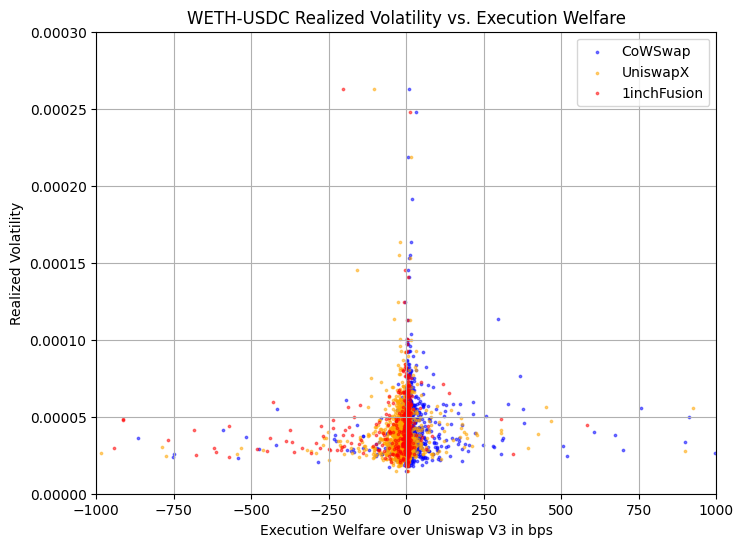

In [17]:
import matplotlib.pyplot as plt
# import latexify
# # Assuming df_cow_weth_result is your DataFrame
# latexify.latexify(fig_width=8, fig_height=6)
plt.figure(figsize=(8, 6))
plt.scatter(10000*df_cow_weth_result['weighted_avg_solver_v3_welfare'], df_cow_weth_result['realized_volatility'], s=3, alpha=0.5, color='blue',label='CoWSwap')
plt.scatter(10000*df_unix_weth_result['weighted_avg_solver_v3_welfare'], df_unix_weth_result['realized_volatility'], s=3, alpha=0.5, color='orange',label='UniswapX')
plt.scatter(10000*df_1inch_weth_result['weighted_avg_solver_v3_welfare'], df_1inch_weth_result['realized_volatility'], s=3, alpha=0.5, color='red',label='1inchFusion')

plt.xlim([10000*-0.1, 10000*0.1])  # Replace xmin and xmax with your desired limits
plt.ylim([0, 0.0003])  # Replace ymin and ymax with your desired limits

# Adding titles and labels
plt.title('WETH-USDC Realized Volatility vs. Execution Welfare')
plt.xlabel('Execution Welfare over Uniswap V3 in bps')
plt.ylabel('Realized Volatility')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()


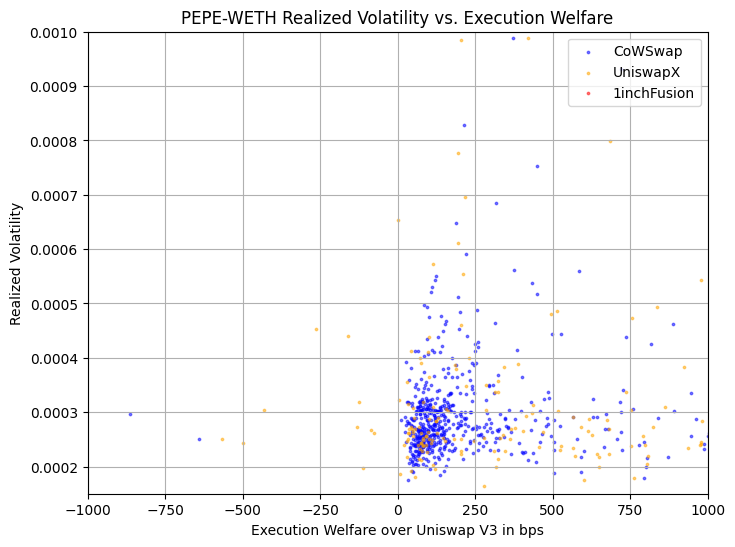

In [18]:
import matplotlib.pyplot as plt
#import latexify
# Assuming df_cow_weth_result is your DataFrame
#latexify.latexify(fig_width=8, fig_height=6)
plt.figure(figsize=(8, 6))
plt.scatter(10000*df_cow_pepe_result['weighted_avg_solver_v3_welfare'], df_cow_pepe_result['realized_volatility'], s=3, alpha=0.5, color='blue',label='CoWSwap')
plt.scatter(10000*df_unix_pepe_result['weighted_avg_solver_v3_welfare'], df_unix_pepe_result['realized_volatility'], s=3, alpha=0.5, color='orange',label='UniswapX')
plt.scatter(10000*df_1inch_pepe_result['weighted_avg_solver_v3_welfare'], df_1inch_pepe_result['realized_volatility'], s=3, alpha=0.5, color='red',label='1inchFusion')

plt.xlim([10000*-0.1, 10000*0.1])  # Replace xmin and xmax with your desired limits
plt.ylim([0.00015, 0.001])  # Replace ymin and ymax with your desired limits

# Adding titles and labels
plt.title('PEPE-WETH Realized Volatility vs. Execution Welfare')
plt.xlabel('Execution Welfare over Uniswap V3 in bps')
plt.ylabel('Realized Volatility')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()


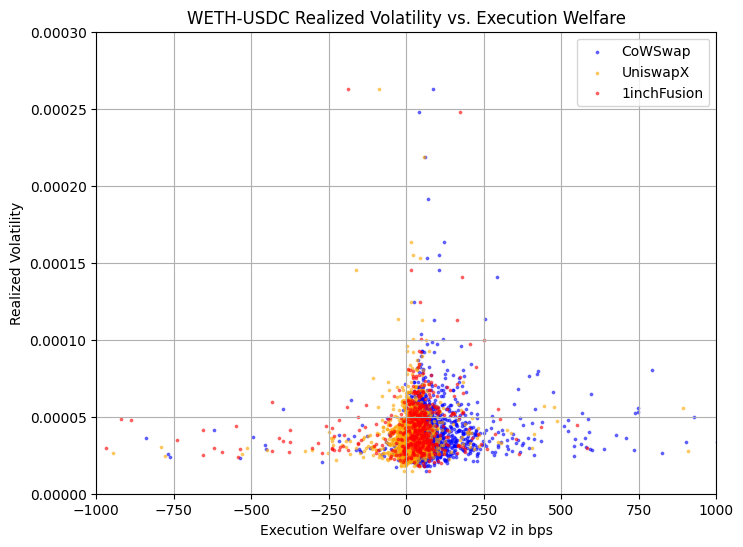

In [19]:
import matplotlib.pyplot as plt

# Assuming df_cow_weth_result is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(10000*df_cow_weth_result['weighted_avg_solver_v2_welfare'], df_cow_weth_result['realized_volatility'], s=3, alpha=0.5, color='blue',label='CoWSwap')
plt.scatter(10000*df_unix_weth_result['weighted_avg_solver_v2_welfare'], df_unix_weth_result['realized_volatility'], s=3, alpha=0.5, color='orange',label='UniswapX')
plt.scatter(10000*df_1inch_weth_result['weighted_avg_solver_v2_welfare'], df_1inch_weth_result['realized_volatility'], s=3, alpha=0.5, color='red',label='1inchFusion')
plt.xlim([10000*-0.1, 10000*0.1])  # Replace xmin and xmax with your desired limits
plt.ylim([0, 0.0003])  # Replace ymin and ymax with your desired limits

# Adding titles and labels
plt.title('WETH-USDC Realized Volatility vs. Execution Welfare')
plt.xlabel('Execution Welfare over Uniswap V2 in bps')
plt.ylabel('Realized Volatility')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()


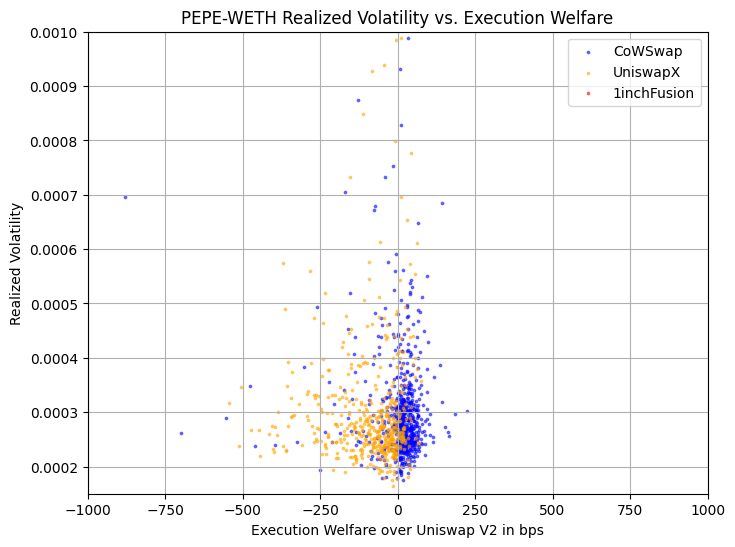

In [20]:
import matplotlib.pyplot as plt

# Assuming df_cow_weth_result is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(10000*df_cow_pepe_result['weighted_avg_solver_v2_welfare'], df_cow_pepe_result['realized_volatility'], s=3, alpha=0.5, color='blue',label='CoWSwap')
plt.scatter(10000*df_unix_pepe_result['weighted_avg_solver_v2_welfare'], df_unix_pepe_result['realized_volatility'], s=3, alpha=0.5, color='orange',label='UniswapX')
plt.scatter(10000*df_1inch_pepe_result['weighted_avg_solver_v2_welfare'], df_1inch_pepe_result['realized_volatility'], s=3, alpha=0.5, color='red',label='1inchFusion')
plt.xlim([10000*-0.1, 10000*0.1])  # Replace xmin and xmax with your desired limits
plt.ylim([0.00015, 0.001])  # Replace ymin and ymax with your desired limits

# Adding titles and labels
plt.title('PEPE-WETH Realized Volatility vs. Execution Welfare')
plt.xlabel('Execution Welfare over Uniswap V2 in bps')
plt.ylabel('Realized Volatility')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()


In [21]:
# Extract the relevant columns
cow_weth_welfare = df_cow_weth_result['weighted_avg_solver_v2_welfare']
cow_weth_volatility = df_cow_weth_result['realized_volatility']

unix_weth_welfare = df_unix_weth_result['weighted_avg_solver_v2_welfare']
unix_weth_volatility = df_unix_weth_result['realized_volatility']

inch_weth_welfare = df_1inch_weth_result['weighted_avg_solver_v2_welfare']
inch_weth_volatility = df_1inch_weth_result['realized_volatility']

# Calculate correlations pairwise
corr_cow = cow_weth_welfare.corr(cow_weth_volatility)
corr_unix = unix_weth_welfare.corr(unix_weth_volatility)
corr_inch = inch_weth_welfare.corr(inch_weth_volatility)

# Print the correlations
print(f"Cow-WETH correlation: {corr_cow}")
print(f"Unix-WETH correlation: {corr_unix}")
print(f"1inch-WETH correlation: {corr_inch}")


Cow-WETH correlation: 0.030971713412362583
Unix-WETH correlation: 0.04970919342522979
1inch-WETH correlation: 0.04648651727566432


In [22]:
# Extract the relevant columns
cow_weth_welfare = df_cow_weth_result['weighted_avg_solver_v3_welfare']
cow_weth_volatility = df_cow_weth_result['realized_volatility']

unix_weth_welfare = df_unix_weth_result['weighted_avg_solver_v3_welfare']
unix_weth_volatility = df_unix_weth_result['realized_volatility']

inch_weth_welfare = df_1inch_weth_result['weighted_avg_solver_v3_welfare']
inch_weth_volatility = df_1inch_weth_result['realized_volatility']

# Calculate correlations pairwise
corr_cow = cow_weth_welfare.corr(cow_weth_volatility)
corr_unix = unix_weth_welfare.corr(unix_weth_volatility)
corr_inch = inch_weth_welfare.corr(inch_weth_volatility)

# Print the correlations
print(f"Cow-WETH correlation: {corr_cow}")
print(f"Unix-WETH correlation: {corr_unix}")
print(f"1inch-WETH correlation: {corr_inch}")


Cow-WETH correlation: 0.02672016633321625
Unix-WETH correlation: 0.031027151335337313
1inch-WETH correlation: 0.07649693512616963


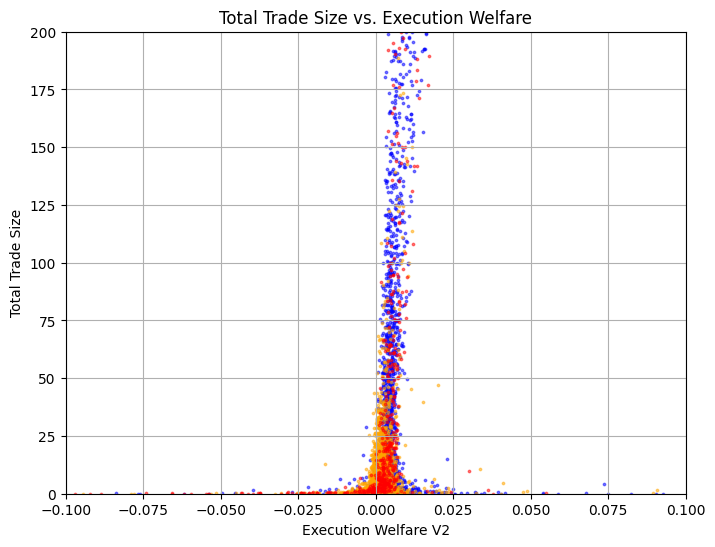

In [23]:
import matplotlib.pyplot as plt

# Assuming df_cow_weth_result is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df_cow_weth_result['weighted_avg_solver_v2_welfare'], df_cow_weth_result['sum_eth_volume'], s=3, alpha=0.5, color='blue')
plt.scatter(df_unix_weth_result['weighted_avg_solver_v2_welfare'], df_unix_weth_result['sum_eth_volume'], s=3, alpha=0.5, color='orange')
plt.scatter(df_1inch_weth_result['weighted_avg_solver_v2_welfare'], df_1inch_weth_result['sum_eth_volume'], s=3, alpha=0.5, color='red')


plt.xlim([-0.1, 0.1])  # Replace xmin and xmax with your desired limits
plt.ylim([0, 200])  # Replace ymin and ymax with your desired limits

# Adding titles and labels
plt.title('Total Trade Size vs. Execution Welfare')
plt.xlabel('Execution Welfare V2')
plt.ylabel('Total Trade Size')

# Show the plot
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

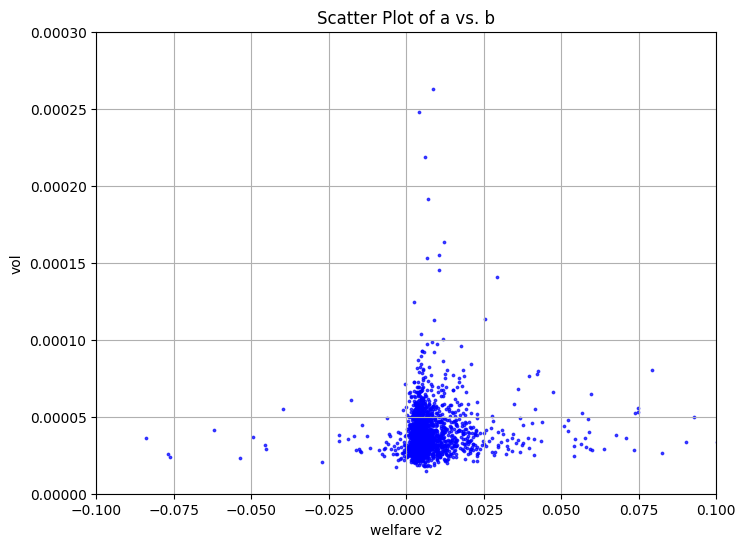

In [24]:
plt.clf()
# Assuming df_cow_weth_result is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df_cow_weth_result['weighted_avg_solver_v2_welfare'], df_cow_weth_result['realized_volatility'], s=3, alpha=0.7, color='blue')

plt.xlim([-0.1, 0.1])  # Replace xmin and xmax with your desired limits
plt.ylim([0, 0.0003])  # Replace ymin and ymax with your desired limits

# Adding titles and labels
plt.title('Scatter Plot of a vs. b')
plt.xlabel('welfare v2')
plt.ylabel('vol')

# Show the plot
plt.grid(True)
plt.show()


In [25]:
df_unix_weth_result.head()

,window,weighted_avg_markout_percentage,weighted_avg_solver_v2_welfare,weighted_avg_solver_v3_welfare,sum_eth_volume,realized_volatility,venue,asset
0,2023-08-26 16:00:00,-0.004769,0.009848,0.007956,0.683271,0.000050,UNIX,weth
1,2023-08-27 00:00:00,-0.001266,0.003348,0.000626,2.150350,0.000054,UNIX,weth
2,2023-08-27 02:00:00,-0.000634,0.004013,0.000897,3.550000,0.000054,UNIX,weth
3,2023-08-27 16:00:00,-0.000800,0.001004,0.000108,2.000000,0.000062,UNIX,weth
4,2023-08-27 18:00:00,-0.001301,0.005984,0.003190,5.944496,0.000054,UNIX,weth


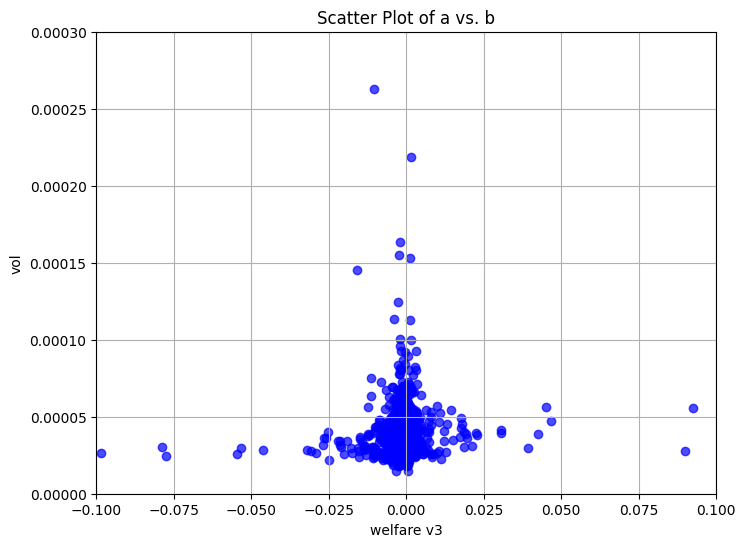

In [26]:
import matplotlib.pyplot as plt

# Assuming df_cow_weth_result is your DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df_unix_weth_result['weighted_avg_solver_v3_welfare'], df_unix_weth_result['realized_volatility'], alpha=0.7, color='blue')

plt.xlim([-0.1, 0.1])  # Replace xmin and xmax with your desired limits
plt.ylim([0, 0.0003])  # Replace ymin and ymax with your desired limits

# Adding titles and labels
plt.title('Scatter Plot of a vs. b')
plt.xlabel('welfare v3')
plt.ylabel('vol')

# Show the plot
plt.grid(True)
plt.show()
